C:\Users\james\AppData\Local\Temp\ipykernel_22360\2777456012.py:50: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


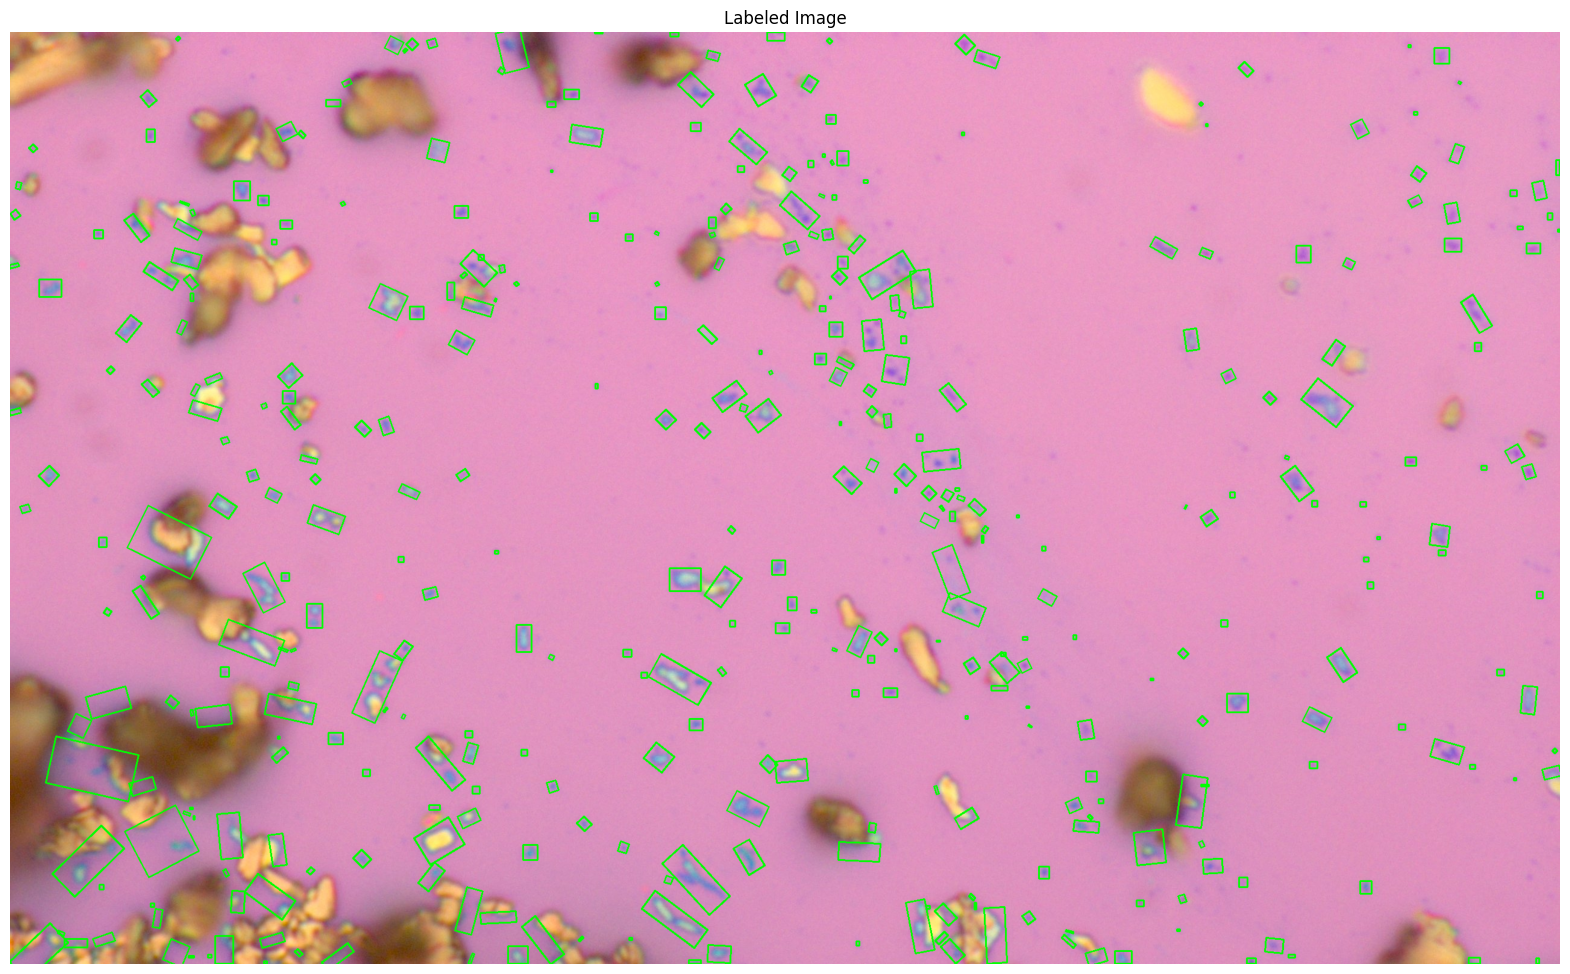

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ColorSegmentation:
    def __init__(self, lower_bound, upper_bound, min_area, min_alpha):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.min_area = min_area
        self.min_alpha = min_alpha

    def detect_color(self, image):
        # Convert image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Create a mask for the specified color range
        mask = cv2.inRange(hsv_image, self.lower_bound, self.upper_bound)

        # Apply morphological operations to enhance regions
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        # Find contours of color regions
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw rectangles around color regions
        for contour in contours:
            # Calculate contour area
            area = cv2.contourArea(contour)

            # Skip small patches
            if area < self.min_area:
                continue

            # Calculate the minimum enclosing rectangle
            rect = cv2.minAreaRect(contour)
            (x, y), (w, h), angle = rect

            # Calculate the transparency level (alpha value) if image has an alpha channel
            alpha = 255  # Default value if no alpha channel exists
            if len(image.shape) == 3 and image.shape[2] == 4:
                alpha = np.mean(image[int(y):int(y + h), int(x):int(x + w), 3])

            # Skip patches with low transparency
            if alpha < self.min_alpha:
                continue

            # Draw the adjusted rectangle
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(image, [box], 0, (0, 255, 0), 2)

        return image

# Define the lower and upper bounds for purple color in HSV
lower_purple = np.array([139, 60, 150])  # Adjust these values as needed
upper_purple = np.array([156, 102, 217])  # Adjust these values as needed

# Minimum contour area for small patches
min_area = 7  # Adjust this value as needed

# Minimum transparency level (alpha value) for patches
min_alpha = 255  # Adjust this value as needed

# Create an instance of ColorSegmentation
color_segmentation = ColorSegmentation(lower_purple, upper_purple, min_area, min_alpha)

# Load the image
image = cv2.imread("image data/1.jpg")

# Detect and label color regions
labeled_image = color_segmentation.detect_color(image)

# Plot the labeled image using Matplotlib
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title("Labeled Image")
plt.axis("off")
plt.show()

In the code you mentioned, the min_alpha variable represents the minimum transparency level (alpha value) required for a patch to be considered.

A higher min_alpha value means a higher threshold for transparency, so patches with lower transparency (more opaque) will be skipped. Conversely, a lower min_alpha value means a lower threshold for transparency, so patches with higher transparency (more transparent) will also be included.

In other words:

If you set min_alpha to a higher value (e.g., 200), only patches with a high transparency level (close to fully transparent) will be selected.
If you set min_alpha to a lower value (e.g., 50), even patches with a lower transparency level (less transparent, more opaque) will be considered and included.
You can adjust the min_alpha value based on your specific requirements and the transparency level you want to include or exclude in the selection process.